<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/11.AI/%E5%8B%95%E6%89%8B%E4%B8%B2%E6%8E%A5_LLM_API_%E5%85%A5%E9%96%80%E6%95%99%E5%AD%B8(Gemini_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  LLM 入門課 - 動手串接 LLM API

### 📝 Part 1: 環境設定與介紹

歡迎來到「LLM 入門課」的實作環節！

在這個 Colab 筆記本中，我們將一步步帶你完成所有課程中的程式碼範例。

在開始之前，請先完成以下步驟：

- 取得 API 金鑰: 前往 Google AI Studio 取得你的 Gemini API 金鑰。
- 設定 Colab Secrets: 為了安全地儲存你的 API 金鑰，請點擊左側邊欄的「🔑」(金鑰) 圖示，建立一個名為 GEMINI_API_KEY 的密鑰，並將你的金鑰貼入其值中。請務必啟用「Notebook access」。

執行下方的儲存格來安裝必要的 Python 函式庫。

In [1]:
!pip install -q requests

print("✅ 環境設定完成！")

✅ 環境設定完成！


### 🔑 Part 2: 你的第一個 LLM API 請求

現在，讓我們來發送第一個對 Gemini API 的請求。

這個環節對應課程的 Part 2，我們將會：

- 從 Colab Secrets 中讀取 API 金鑰。
- 定義一個函式來呼叫 API。
- 發送一個簡單的問候語，並看看 LLM 如何回應！

執行下方的儲存格來定義函式並發送請求。

In [2]:
import requests
import json
from google.colab import userdata

def call_gemini_api(prompt, api_key, temperature=0.7):
    """
    一個通用的函式，用來呼叫 Google Gemini API。

    Args:
        prompt (str): 你想傳送給模型的指令。
        api_key (str): 你的 Google AI Studio API 金鑰。
        temperature (float): 控制模型輸出的隨機性，介於 0.0 到 1.0 之間。

    Returns:
        str: 模型生成的回應文字，如果失敗則返回錯誤訊息。
    """
    if not api_key:
        return "❌ 錯誤：找不到 API 金鑰。請確認你已經在 Colab Secrets 中設定了 'GEMINI_API_KEY'。"

    # Gemini API 的 Endpoint
    url = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key={api_key}"
    headers = {'Content-Type': 'application/json'}

    # API 請求的 Payload
    data = {
        "contents": [{"parts": [{"text": prompt}]}],
        "generationConfig": {
            "temperature": temperature,
            "maxOutputTokens": 800
        }
    }

    print("🚀 正在發送請求至 Gemini API...")
    print(f"指令 (Prompt): {prompt[:100]}...") # 只顯示部分 prompt

    try:
        response = requests.post(url, headers=headers, data=json.dumps(data), timeout=60)
        response.raise_for_status()
        result = response.json()

        if (result.get('candidates') and result['candidates'][0]['content']['parts'][0]['text']):
            return result['candidates'][0]['content']['parts'][0]['text']
        else:
            if result.get('promptFeedback', {}).get('blockReason'):
                reason = result['promptFeedback']['blockReason']
                return f"❌ 請求被阻擋，原因: {reason}"
            return f"❌ 無法從 API 回應中解析出有效的文字。回應內容: {result}"

    except requests.exceptions.RequestException as e:
        return f"❌ 請求失敗: {e}"
    except Exception as e:
        return f"❌ 發生未知錯誤: {e}"



In [3]:
# --- 主程式執行區 ---
try:
    # 從 Colab Secrets 讀取 API 金鑰
    API_KEY = userdata.get('GEMINI_API_KEY')
except userdata.SecretNotFoundError:
    API_KEY = None

# 我們的第一個 prompt
first_prompt = "你好！請用繁體中文做個簡短的自我介紹，並說一句鼓勵 Python 工程師的話。"

# 呼叫函式並印出結果
response_text = call_gemini_api(first_prompt, API_KEY)

print("\n💡 Gemini API 的回應：")
print("="*50)
print(response_text)
print("="*50)

🚀 正在發送請求至 Gemini API...
指令 (Prompt): 你好！請用繁體中文做個簡短的自我介紹，並說一句鼓勵 Python 工程師的話。...

💡 Gemini API 的回應：
大家好！我是個大型語言模型，擅長處理文字相關的任務，像是翻譯、寫作、問答等等。很高興能為大家服務。

給所有 Python 工程師們：**Keep coding, keep creating!** （持續編碼，持續創造！）



In [4]:
import os
import google.generativeai as genai

genai.configure(api_key=API_KEY)

# 初始化通訊協定
model = genai.GenerativeModel('gemini-2.5-flash')
response = model.generate_content(
    contents='用一句話解釋什麼是 Cyberpunk？'
)

print(f"SYSTEM_RESPONSE: {response.text}")

SYSTEM_RESPONSE: Cyberpunk描繪的是一個**科技極度發達，但社會卻充滿貧富差距、人性異化，並由巨型企業宰制的反烏托邦未來**。


In [6]:
# 下載範例圖片
import requests
from urllib.parse import urlparse
import os

image_url = "https://megapx-assets.dcard.tw/images/f8346eb3-b540-401a-bf68-41e3d1300e67/1280.webp"

def download_image(url):
    """下載圖片並回傳檔案名稱"""
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()

        # 從 URL 取得檔案名稱
        parsed_url = urlparse(url)
        filename = os.path.basename(parsed_url.path)

        if not filename:
            # 如果 URL 沒有明確的檔案名稱，設定一個預設名稱
            filename = "downloaded_image.webp"

        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"圖片已成功下載為: {filename}")
        return filename
    except requests.exceptions.RequestException as e:
        print(f"下載圖片時發生錯誤: {e}")
        return None

# 執行下載
image_filename = download_image(image_url)

if image_filename:
    print(f"取得的檔案名稱為: {image_filename}")
else:
    print("無法取得檔案名稱，圖片下載失敗。")

圖片已成功下載為: 1280.webp
取得的檔案名稱為: 1280.webp


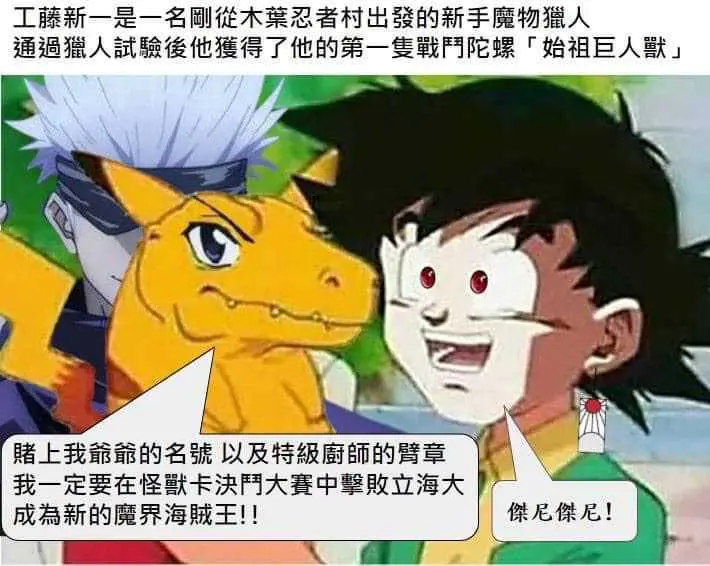

In [11]:
from IPython.display import Image, display
from PIL import Image as PILImage

if image_filename:
    try:
        # Load the webp image
        img = PILImage.open(image_filename)
        # Convert and save as png temporarily
        png_filename = image_filename.replace('.webp', '.png')
        img.save(png_filename)
        display(Image(filename=png_filename))
        # Optionally, remove the temporary png file
        import os
        os.remove(png_filename)
    except Exception as e:
        print(f"無法顯示圖片: {e}")
else:
    print("沒有圖片檔案可以顯示。")

In [8]:
import google.generativeai as genai
from PIL import Image

genai.configure(api_key=API_KEY)

client = genai.GenerativeModel('gemini-2.5-flash')
image = Image.open(image_filename) # 圖片

# 多模態輸入：圖像 + 文本指令
response = client.generate_content(
    contents=['分析這張掃描圖中的異常數據。', image]
)

print(response.text)

這張掃描圖中的異常數據主要體現在對大量動漫、漫畫和流行文化元素的極度混搭和錯位使用，創造出了一種荒謬且充滿幽默感的「縫合怪」內容。以下是具體的異常點分析：

1.  **頂部文字描述的內容與角色不符：**
    *   **「工藤新一是一名剛從木葉忍者村出發的新手魔物獵人」**：
        *   **工藤新一** 是《名偵探柯南》的角色，是高中生偵探，而非魔物獵人。
        *   **木葉忍者村** 是《火影忍者》中的地點，與工藤新一無關。
        *   **新手魔物獵人** 則是一種職業設定，與工藤新一的偵探身份不符，且可能影射《魔物獵人》遊戲或其他奇幻作品。
    *   **「通過獵人試驗後他獲得了他的第一隻戰鬥陀螺『始祖巨人獸』」**：
        *   **獵人試驗** 是《獵人X獵人》中的設定。
        *   **戰鬥陀螺** 是《戰鬥陀螺》系列中的玩具。
        *   **始祖巨人獸**：「始祖巨人」來自《進擊的巨人》，「獸」可能指《數碼寶貝》等。這完全是一個將不同作品概念強行組合的詞彙。

2.  **圖片中的角色身份混亂：**
    *   **背景人物（左側）**：是《咒術迴戰》中的 **五條悟** (Gojo Satoru)。
    *   **中間動物角色（黃色恐龍）**：是《數碼寶貝》中的 **亞古獸** (Agumon)。
    *   **右側人物（小孩）**：是《七龍珠》中的 **孫悟空** (Goku) 的幼年形態。
    *   **視覺元素混搭**：左側的黃色手臂與背景的五條悟結合，產生一種錯覺，但實際更像是亞古獸。

3.  **角色對話內容與角色本身及其他作品設定混搭：**
    *   **左側對話框（發言者不明，可能由亞古獸或五條悟代表）**：
        *   **「賭上我爺爺的名號」**：可能指《航海王》中蒙其·D·魯夫（爺爺是卡普）或《遊戲王》中武藤遊戲（爺爺是雙六）。
        *   **「以及特級廚師的臂章」**：可能指《航海王》中的香吉士或《食戟之靈》中的角色。
        *   **「我一定要在怪獸卡決鬥大賽中擊敗立海大」**：
            *   **怪獸卡決鬥大賽** 明顯指《遊戲王》的卡牌決鬥。
   

### 🌡️ Part 3: 掌握關鍵 API 參數 (Temperature)

temperature 是一個非常重要的參數，它控制著模型回覆的「創意程度」或「隨機性」。

- 低 temperature (例如 0.1): 回應會比較穩定、可預測、更貼近事實。適合需要精確答案的場景。
- 高 temperature (例如 0.9): 回應會更有創意、更多樣化、更天馬行空。適合需要腦力激盪的場景。

執行下方的儲存格，比較看看不同 temperature 設定下的差異。

觀察看看，高溫下的點子是不是感覺更有趣、更多元？

In [ ]:
creative_prompt = "幫我發想三個有創意的 Python 小專案點子"

print("--- 實驗 1: 低溫 (temperature=0.1) ---")
low_temp_response = call_gemini_api(creative_prompt, API_KEY, temperature=0.1)
print(low_temp_response)
print("\n" + "="*50 + "\n")

--- 實驗 1: 低溫 (temperature=0.1) ---
🚀 正在發送請求至 Gemini API...
指令 (Prompt): 幫我發想三個有創意的 Python 小專案點子...
好的，這裡提供三個有創意的 Python 小專案點子，並附上簡要說明和可能的技術方向：

**1.  AI 食譜生成器 (AI Recipe Generator)**

*   **概念：**  利用機器學習模型，根據使用者提供的食材、飲食偏好（例如：素食、無麩質）和烹飪時間，自動生成食譜。
*   **創意點：**
    *   **減少浪費：**  幫助使用者利用現有食材，避免食物浪費。
    *   **探索新口味：**  提供意想不到的食譜組合，激發烹飪靈感。
    *   **個性化推薦：**  根據使用者歷史紀錄和喜好，提供更精準的食譜建議。
*   **技術方向：**
    *   **自然語言處理 (NLP):**  處理食材名稱、飲食偏好等文字輸入。
    *   **機器學習 (ML):**  訓練模型，學習食材之間的搭配關係，並生成食譜步驟。
    *   **資料庫：**  儲存食材資訊、食譜範例等資料。
    *   **可能的 Python 函式庫：**  `nltk`, `transformers`, `scikit-learn`, `pandas`, `requests` (用於抓取食譜資料)
    *   **額外挑戰：**  加入圖片生成功能，讓 AI 生成食譜的圖片。

**2.  互動式故事生成器 (Interactive Story Generator)**

*   **概念：**  使用者可以透過選擇不同的選項，影響故事的發展方向，創造獨一無二的故事情節。
*   **創意點：**
    *   **沉浸式體驗：**  讓使用者成為故事的一部分，增加參與感。
    *   **多重結局：**  提供多種不同的結局，增加故事的趣味性和可玩性。
    *   **主題多樣性：**  可以設計不同主題的故事，例如：科幻、奇幻、愛情等。
*   **技術方向：**
    *   **資料結構：**  使用圖 (Graph) 或樹 (Tree) 結構來表示故事的分支和選項。
    *   **使用者介面 (UI

In [ ]:
print("--- 實驗 2: 高溫 (temperature=0.9) ---")
high_temp_response = call_gemini_api(creative_prompt, API_KEY, temperature=0.9)
print(high_temp_response)
print("\n" + "="*50 + "\n")

--- 實驗 2: 高溫 (temperature=0.9) ---
🚀 正在發送請求至 Gemini API...
指令 (Prompt): 幫我發想三個有創意的 Python 小專案點子...
好的，這裡提供你三個有創意的 Python 小專案點子，兼顧趣味性與實用性：

**1.  自動化情緒分析與建議播放清單產生器 (Sentiment-Based Playlist Generator)**

*   **概念:** 這個專案結合了文字情緒分析與音樂串流服務 (例如 Spotify)。使用者輸入一段文字 (日記、評論、推文等)，程式會分析這段文字的情緒 (正面、負面、中性)，然後根據分析結果自動產生一個符合該情緒的 Spotify 播放清單。

*   **技術要點:**
    *   **情緒分析:** 使用 Python 的 NLTK、TextBlob 或 Transformers 庫 (例如 Hugging Face) 來進行情緒分析。
    *   **Spotify API:** 使用 Spotipy 或類似的庫來連接 Spotify API，搜尋歌曲、建立播放清單等。
    *   **情緒與音樂的關聯:** 設計一套邏輯，將不同情緒與不同音樂類型、節奏、風格關聯起來。  例如，正面情緒可能對應輕快、歡樂的音樂；負面情緒可能對應抒情、放鬆的音樂。
    *   **使用者介面 (可選):**  可以使用 Tkinter、PyQt 或 Flask 等庫建立一個簡單的圖形介面或網頁介面，讓使用者輸入文字和查看結果。

*   **創意亮點:**
    *   個性化的音樂體驗：根據使用者當下的心情自動生成音樂，更貼近使用者的需求。
    *   結合 AI 與音樂：將自然語言處理技術應用於音樂推薦，帶來新的可能性。
    *   實用性：可以幫助使用者快速找到適合自己心情的音樂，提升生活品質。

**2.  AI 食譜產生器與食材辨識器 (AI Recipe Generator & Ingredient Identifier)**

*   **概念:** 這個專案可以讓使用者上傳冰箱裡現有食材的照片，程式會使用機器學習來辨識這些食材，然後根據這些食材自動生成食譜。

*   **技術要點:**
    *   **影像辨識:**  使

### 💻 Part 4: 實戰應用 - 程式碼註解產生器

現在，我們要來打造一個實用的小工具：**程式碼註解產生器**。

這邊的關鍵在於 Prompt Engineering (指令工程)。我們會設計一個結構化的指令，告訴 LLM 它的角色、任務、輸入和輸出格式，讓它能穩定地完成我們交辦的工作。

執行下方的儲-存格來定義函式並產生註解。

In [ ]:
def generate_code_comment(code_snippet: str, api_key: str):
  """
  為一段 Python 程式碼生成函式註解 (docstring)。

  Args:
      code_snippet (str): 需要被註解的 Python 程式碼。
      api_key (str): 你的 Google AI Studio API 金鑰。

  Returns:
      str: 模型生成的註解。
  """
  # --- Prompt Engineering 的核心 ---
  prompt_template = f"""
  你是一位資深的 Python 開發者，你的任務是為以下的 Python 函式撰寫專業且清晰的 docstring。

  請遵循 Google Python 風格指南的 docstring 格式。
  你的回覆應該只包含 docstring 的內容，不要包含任何額外的解釋或程式碼區塊標記 (例如 ```python ... ```)。

  這是需要加上註解的函式：
  {code_snippet}

  請生成對應的 docstring:
  """

  # 為了讓註解更精確，我們使用較低的 temperature
  comment_response = call_gemini_api(prompt_template, api_key, temperature=0.2)
  return comment_response.strip()

In [ ]:
# 準備一段沒有註解的程式碼
sample_code = """
def process_user_data(data: dict, user_list: list) -> str:
    if not isinstance(data, dict) or 'id' not in data:
        raise TypeError("Input 'data' must be a dict with an 'id' key.")
    user_id = data.get('id')
    if user_id in user_list:
        return f"User {user_id} already exists."
    user_list.append(user_id)
    return f"User {user_id} added successfully."
"""

print("\n--- 程式碼註解產生器 ---")
print("原始程式碼:")
print(sample_code)


--- 程式碼註解產生器 ---
原始程式碼:

def process_user_data(data: dict, user_list: list) -> str:
    if not isinstance(data, dict) or 'id' not in data:
        raise TypeError("Input 'data' must be a dict with an 'id' key.")
    user_id = data.get('id')
    if user_id in user_list:
        return f"User {user_id} already exists."
    user_list.append(user_id)
    return f"User {user_id} added successfully."



In [ ]:
# 呼叫函式
docstring = generate_code_comment(sample_code, API_KEY)

🚀 正在發送請求至 Gemini API...
指令 (Prompt): 
  你是一位資深的 Python 開發者，你的任務是為以下的 Python 函式撰寫專業且清晰的 docstring。

  請遵循 Google Python 風格指南的 docstring 格式...


In [ ]:
print("\n💡 AI 生成的 Docstring:")
print("="*50)
print(docstring)
print("="*50)
print("\n✨ 將註解整合回原始碼:")


💡 AI 生成的 Docstring:
"""Processes user data and adds the user ID to a list if it doesn't exist.

  Args:
    data: A dictionary containing user data, which must include an 'id' key.
    user_list: A list of existing user IDs.

  Returns:
    A string indicating whether the user was added successfully or already exists.

  Raises:
    TypeError: If the input 'data' is not a dictionary or does not contain an 'id' key.
  """

✨ 將註解整合回原始碼:


In [ ]:
# 為了美觀，我們將生成的 docstring 插入到原始碼中再印出
# 尋找第一個 ":" 的位置來插入 docstring
final_code = sample_code.replace(":", ":\n    \"\"\"\n    " + docstring.replace("\n", "\n    ") + "\n    \"\"\"", 1)
print(final_code)


def process_user_data(data:
    """
    """Processes user data and adds the user ID to a list if it doesn't exist.
    
      Args:
        data: A dictionary containing user data, which must include an 'id' key.
        user_list: A list of existing user IDs.
    
      Returns:
        A string indicating whether the user was added successfully or already exists.
    
      Raises:
        TypeError: If the input 'data' is not a dictionary or does not contain an 'id' key.
      """
    """ dict, user_list: list) -> str:
    if not isinstance(data, dict) or 'id' not in data:
        raise TypeError("Input 'data' must be a dict with an 'id' key.")
    user_id = data.get('id')
    if user_id in user_list:
        return f"User {user_id} already exists."
    user_list.append(user_id)
    return f"User {user_id} added successfully."



In [ ]:
from google.genai import types

# 1. 定義外部系統接口 (Python Function)
def access_database(query: str) -> dict:
    """檢索公司內部機密資料庫。

    Args:
        query: SQL 查詢語句或關鍵字
    """
    # 模擬連接到加密伺服器
    return {"status": "200 OK", "data": "Project_X 之機密藍圖"}

# 2. 封裝為 MCP 工具聲明
# 讓 LLM 能夠理解此工具的輸入與輸出規範
db_tool = {
    "function_declarations": [
        {
            "name": "access_database",
            "description": "檢索公司內部機密資料庫。",
            "parameters": {
                "type": "OBJECT",
                "properties": {
                    "query": {"type": "STRING"}
                },
                "required": ["query"]
            }
        }
    ]
}

In [ ]:
import os
from google import genai
from google.genai import types

# ========= 1. 外部系統：模擬資料庫查詢 =========
def access_database(project_name: str) -> dict:
    """模擬查詢公司內部機密資料庫"""
    return {
        "project": project_name,
        "status": "進行中",
        "progress": "65%",
        "last_update": "2025-11-20",
        "note": "已完成藍圖與主要模組設計",
    }


# ========= 2. 宣告成 MCP / Function Calling 工具 ==========
access_database_decl = {
    "name": "access_database",
    "description": "查詢專案進度資料庫",
    "parameters": {
        "type": "object",
        "properties": {
            "project_name": {
                "type": "string",
                "description": "專案名稱，例如 Project_X",
            },
        },
        "required": ["project_name"],
    },
}

tool = types.Tool(function_declarations=[access_database_decl])
config = types.GenerateContentConfig(tools=[tool])


# ========= 3. 建立 Client ==========
# client = genai.Client(api_key=os.environ["GEMINI_API_KEY"])
client = genai.Client(api_key=API_KEY)

# 使用者輸入
user_prompt = "調閱 Project_X 的最新進度"

# ========= 4. 建立第一輪對話內容 ==========
contents = [
    types.Content(
        role="user",
        parts=[types.Part(text=user_prompt)],
    )
]

# ========= 5. 第一次呼叫模型（讓模型決定是否呼叫工具） ==========
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=contents,
    config=config,
)

# ========= 6. 擷取 function_call ==========
tool_call = None
for part in response.candidates[0].content.parts:
    if part.function_call:
        tool_call = part.function_call
        break

if not tool_call:
    print("=== 模型回答（未使用工具） ===")
    print(response.text)
else:
    print("=== AI 發出的工具呼叫 ===")
    print("工具名稱:", tool_call.name)
    print("工具參數:", dict(tool_call.args))

    # ========= 7. 實際執行工具（Python 函數） ==========
    tool_result = access_database(**tool_call.args)

    print("\n=== 工具實際執行結果 ===")
    print(tool_result)

    # ========= 8. 把工具結果包裝進 function_response 給模型 ==========
    function_response_part = types.Part.from_function_response(
        name=tool_call.name,
        response=tool_result,
    )

    contents.append(response.candidates[0].content)      # 模型工具呼叫
    contents.append(types.Content(
        role="user",
        parts=[function_response_part],
    ))

    # ========= 9. 第二次呼叫模型（讓模型整合工具結果、生成答案） ==========
    final_response = client.models.generate_content(
        model="gemini-2.5-flash",
        contents=contents,
        config=config,
    )

    print("\n=== 給使用者看的最終回答 ===")
    print(final_response.text)



=== AI 發出的工具呼叫 ===
工具名稱: access_database
工具參數: {'project_name': 'Project_X'}

=== 工具實際執行結果 ===
{'project': 'Project_X', 'status': '進行中', 'progress': '65%', 'last_update': '2025-11-20', 'note': '已完成藍圖與主要模組設計'}

=== 給使用者看的最終回答 ===
Project_X目前的進度為65%，最後更新日期為2025-11-20，已完成藍圖與主要模組設計。


### 🎉 Part 5 & 6: 課程總結與下一步

恭喜你！你已經成功學會了：
 - ✅ 如何設定環境並安全地使用 API 金鑰。
 - ✅ 如何呼叫 LLM API 並取得回應。
 - ✅ 如何利用 `temperature` 參數控制模型輸出。
 - ✅ 如何透過 Prompt Engineering 打造實用的 AI 小工具。

 **進階主題 (Part 5)** 如對話歷史、串流、JSON 模式，是建立更複雜應用的基石。你可以嘗試修改 `call_gemini_api` 函式，讓 `contents` 參數可以接收多輪對話的歷史紀錄。



**接下來你可以做什麼？**
 1. **修改 Prompt**: 試試看修改「程式碼註解產生器」的 prompt，讓它產生不同風格 (例如 NumPy style) 的註解。
 2. **發想新工具**: 你還能想到什麼可以用 LLM 解決的日常開發問題？(例如：Git commit 訊息產生器、正則表達式產生器、SQL 查詢產生器...) 3. **串接其他服務**: 將這個 Colab 的邏輯整合到你熟悉的 Web 框架 (如 Flask, Django) 或腳本中。

 ---
 **課程到此告一段落，動手玩玩看吧！ Happy Hacking!**